<a href="https://colab.research.google.com/github/drstannwoji2019/SCM_Forecasting/blob/main/DecisionTree_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Generate synthetic data
np.random.seed(0)
n = 100
x = np.linspace(0, 4 * np.pi, n)
noise = np.random.normal(0, 0.5, n)
data = 10 * np.sin(x) + noise

In [3]:
# Create a pandas DataFrame
data_df = pd.DataFrame({'demand': data, 'time': np.arange(len(data))})

In [4]:
# Split the data into training and testing sets
train_df, test_df = train_test_split(data_df, test_size=0.2, random_state=42)

In [5]:
# Define the Decision Tree regressor model
model = DecisionTreeRegressor(random_state=0)

In [6]:
# Fit the model using the training data
X_train = train_df[['time']]
y_train = train_df['demand']
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [7]:
# Forecast the demand for the test data
X_test = test_df[['time']]
y_test = test_df['demand']
y_pred = model.predict(X_test)

In [8]:
# Evaluate the model's performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.2663813379099305


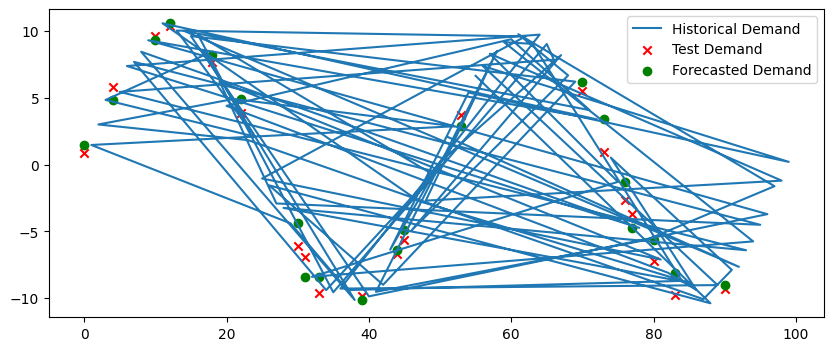

In [9]:
# Plot the historical demand, test demand, and forecasted demand
plt.figure(figsize=(10, 4))
plt.plot(train_df['time'], train_df['demand'], label='Historical Demand')
plt.scatter(test_df['time'], test_df['demand'], label='Test Demand', color='r', marker='x')
plt.scatter(test_df['time'], y_pred, label='Forecasted Demand', color='g', marker='o')
plt.legend()
plt.show()